# Analysis of Satellite Imagery using Unsupervised Classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio.plot
import rasterio
from rasterio import plot
from sklearn import cluster
import pandas as pd
from pylab import cm # for better colormap
%matplotlib inline  

<type 'rasterio._io.RasterReader'>
{'count': 4, 'crs': CRS({'init': u'epsg:4326'}), 'interleave': 'pixel', 'dtype': 'uint16', 'affine': Affine(7.388359801025477e-06, 0.0, 13.45896130137909,
       0.0, -7.388359801025198e-06, 52.489242748181475), 'driver': u'GTiff', 'transform': (13.45896130137909, 7.388359801025477e-06, 0.0, 52.489242748181475, 0.0, -7.388359801025198e-06), 'height': 3164, 'width': 7152, 'blockxsize': 128, 'tiled': True, 'blockysize': 128, 'nodata': None}


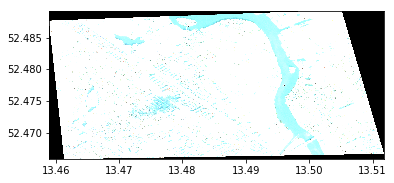

In [2]:
filepath = r"C:\Users\thais\Documents\Up42_data\output\DS_PHR1B_202003141027280_FR1_PX_E013N52_0612_03902\data_pan.tif"

# Open raster file and look at metadata
raster_berlin = rasterio.open(filepath)
print(type(raster_berlin))
print(raster_berlin.profile)

# Read in image and visualize
rasterio.plot.show(raster_berlin)

<type 'numpy.ndarray'>


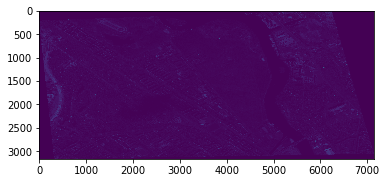

In [3]:
# Extract one of the bands and visualize 
band1 = raster_berlin.read(1)
plt.imshow(band1)
print(type(band1))
plt.imshow(band1)

## Raster Analysis

In [4]:
# Images stored as NumPy arrays are 2-dimensional arrays
print (band1.shape)
# K-means clustering algorithm only ingests 1-dimensional arrays
band1_reshaped = band1.reshape((-1,1))
print(type(band1_reshaped))
print (band1_reshaped.shape)

(3164L, 7152L)
<type 'numpy.ndarray'>
(22628928L, 1L)


# Unsupservised classification with KMeans

In [5]:
# Partition data into 5 clusters. Cluster number was extracted from Suarez-Rubio et al.(2018)
n_clusters = 5
k_means = cluster.KMeans(n_clusters=n_clusters)
k_means.fit(band1_reshaped)

X_cluster = k_means.labels_
X_cluster = X_cluster.reshape(band1.shape)

# Plot classified image

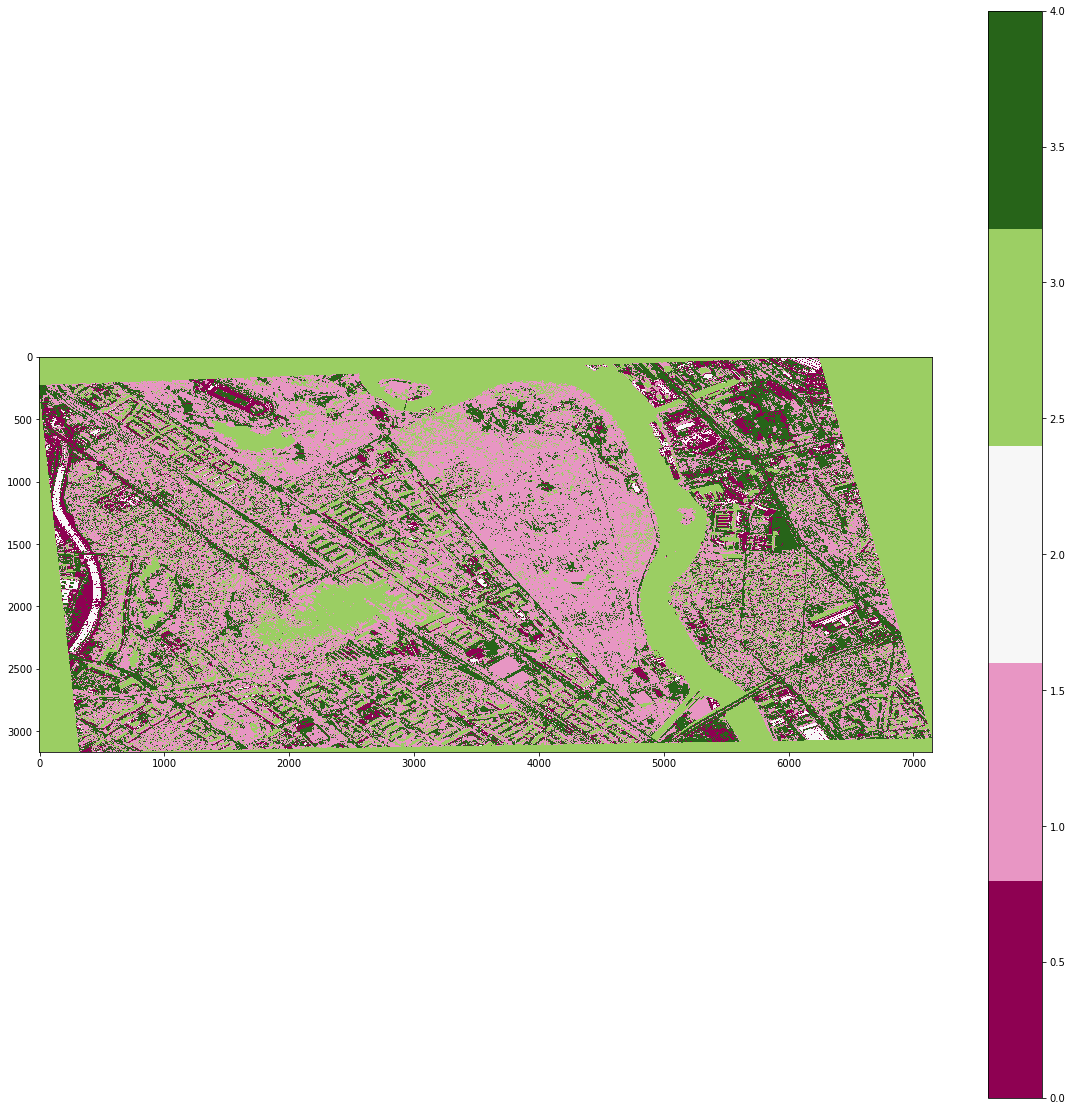

In [6]:
plt.figure(figsize=(20,20))
cmap = cm.get_cmap('PiYG', n_clusters)
plt.imshow(X_cluster, cmap=cmap)

plt.colorbar()
plt.show()

## Create function

In [7]:
def compute_and_display_clusters_for_band(band_index,n_clusters):
    current_band=raster_berlin.read(band_index+1) # make up for 1 based indexing
    reshaped_band=current_band.reshape((-1,1)) # vectorize
    # Perform K-Means analysis
    k_means = cluster.KMeans(n_clusters=5)
    k_means.fit(reshaped_band)
    clusters = k_means.labels_
    clusters = clusters.reshape(band1.shape)
    plt.figure(figsize=(20,20))
    cmap = cm.get_cmap('PiYG', n_clusters)
    plt.imshow(X_cluster, cmap=cmap)
    plt.colorbar()
    plt.show()

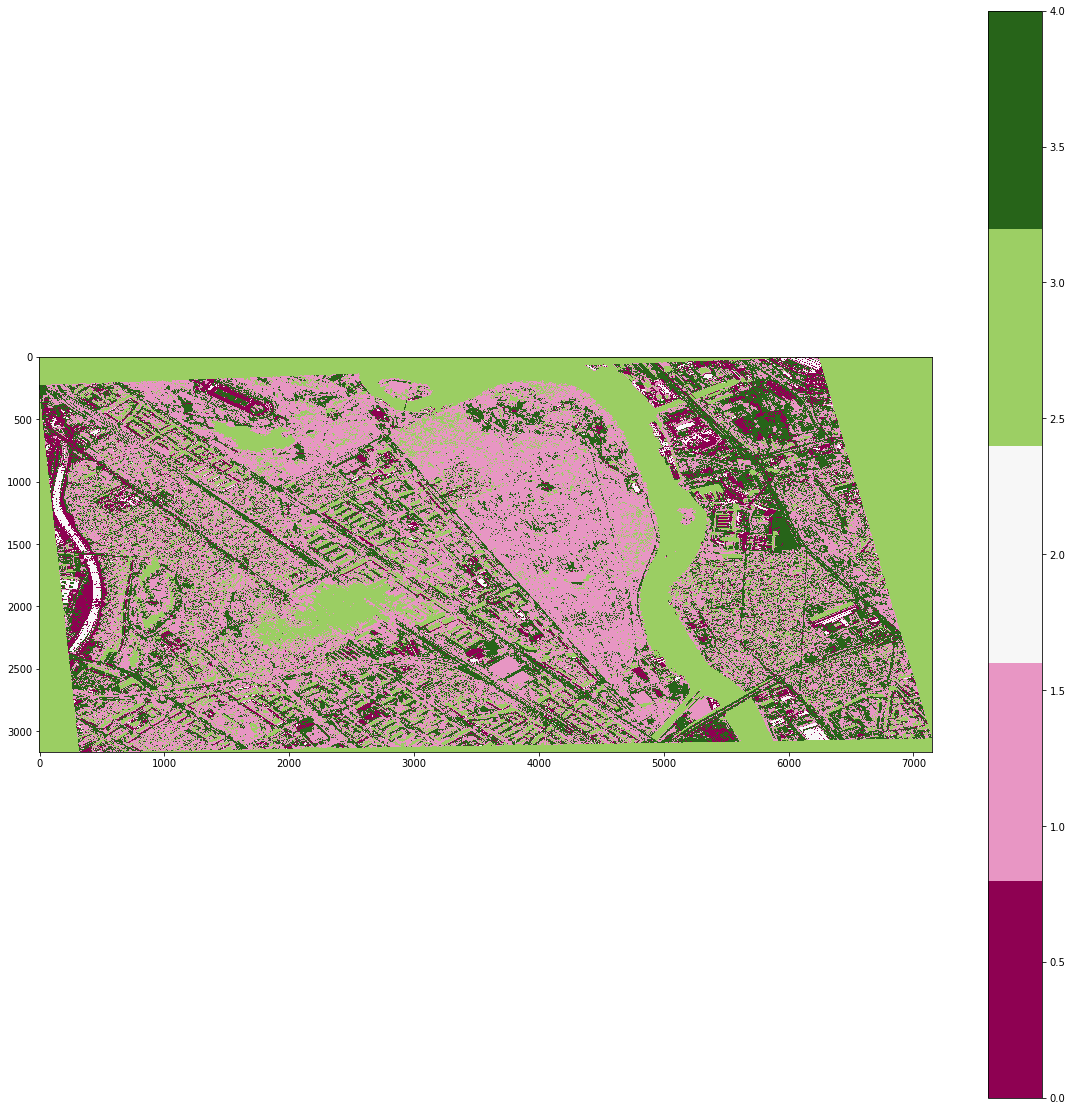

In [8]:
compute_and_display_clusters_for_band(2,5)